In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_simulacoes = 100000 # numero de iteracaoes de mote carlo

probabilidades_transicao = [
    [1,    0,    0,    0,  ],
    [0.3,  0.4,  0.3,  0,  ],
    [0,    0.3,  0.4,  0.3,],
    [0,    0,    0,    1,  ]
    ] # matriz de transição

posicao_inicial = 1 # posição inicial da mosca

In [3]:
# para facilicar criando uma função para encapsular a simulação
def simulacao_monte_carlo(num_simulacoes, probabilidades_transicao, *posicao_inicial):

  tempo_absorcao = []
  estado_absorcao = []
  states_dict = {}

  for n in range(num_simulacoes):

    if not posicao_inicial: # se não for fornecida a posição inicial,
      # sorteia uma aleatoriamente com igual probabilidade
      state = np.random.choice([1, 2]) # usando o chice por conveniencia

    else:
      state = posicao_inicial[0] # mosca inicia a cadeia


    tempo = 0 # tempo inicial da cadeia

    states = [state] # salva os estados em uma listas

    while state not in [0, 3]:

        tempo += 1 # incrementa o tempo decorrido na cadeia

        linha_atual = probabilidades_transicao[state]
        acumulada = np.cumsum(linha_atual) # cdf do estado atual
        r = np.random.uniform(0, 1) # v.a uniforme
        state = np.argmax(acumulada > r) # sorteia o estado atual

        states.append(state) # salva o estado atual na lista

    states_dict[n] = states # armazena os estados por iteração

    tempo_absorcao.append(tempo) # armazena o tempo de absorção
    estado_absorcao.append(state) # armazena o estado de absorção

  return (np.array(tempo_absorcao),
          np.array(estado_absorcao),
          states_dict)

In [4]:
tempo_absorcao, estado_absorcao, states_dict = simulacao_monte_carlo(num_simulacoes, probabilidades_transicao, posicao_inicial)

In [5]:
# dado que a mosca pousou no estado inicial 1, probabilidade de ser absorvida em t=3

probs = np.mean(tempo_absorcao == 3)

print(f'Probabilidade de ser absorvida em t=3: {probs}')


Probabilidade de ser absorvida em t=3: 0.14641


In [6]:
# número médio de passos para a absorção.
probs = np.mean(tempo_absorcao)

print(f'Número médio de passos para a absorção: {probs}')

Número médio de passos para a absorção: 3.3206


In [7]:
# probabilidade de absorção associada a cada estado

probs_0 = np.mean(estado_absorcao == 0)
probs_3 = np.mean(estado_absorcao == 3)

print(f'Probabilidade de ser absorvida no estado 1: {probs_0}')
print(f'Probabilidade de ser absorvida no estado 2: {probs_3}')

Probabilidade de ser absorvida no estado 1: 0.66543
Probabilidade de ser absorvida no estado 2: 0.33457


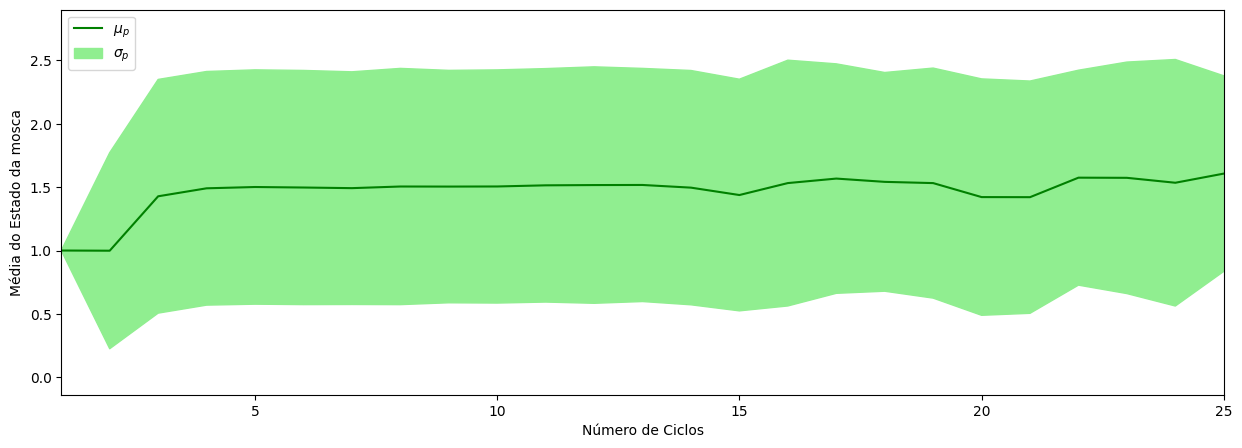

In [8]:
# plotar um gráfico mostrando as transições e a absorção.

# fonte: https://stackoverflow.com/questions/10058227/calculating-mean-of-arrays-with-different-lengths

def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

y, error = tolerant_mean([l for l in states_dict.values()])
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(y))+1, y, color='green', label=r'$\mu_{p}$')
plt.fill_between(np.arange(len(y))+1, y-error, y+error, color='lightgreen', label=r'$\sigma_{p}$')
plt.legend()
plt.xlabel('Número de Ciclos')
plt.ylabel('Média do Estado da mosca')
plt.xlim([1, 25])
_ = plt.show()

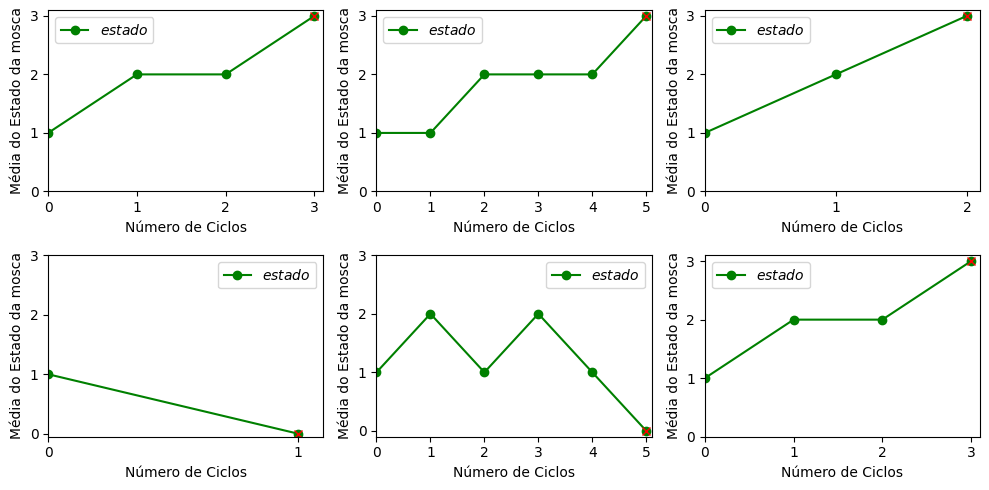

In [9]:
# plot para 6 casos aleatórios

plt.figure(figsize=(10, 5))
for i in range(6):
  n = np.random.randint(0, num_simulacoes)
  y = np.array(states_dict[n])
  plt.subplot(2, 3, i+1)
  plt.plot(y, 'o-', color='green', label=r'$estado$')
  plt.plot(tempo_absorcao[n], estado_absorcao[n], 'rx', )
  plt.legend()
  plt.xlabel('Número de Ciclos')
  plt.ylabel('Média do Estado da mosca')
  plt.xlim([0, tempo_absorcao[n]+0.1])
  plt.yticks([0, 1, 2, 3])
  plt.xticks(np.arange(tempo_absorcao[n]+1))
  plt.tight_layout()
_ = plt.show()